In [33]:
# Importer les bibliothèques nécessaires
import os
import pandas as pd
import matplotlib.pyplot as plt


# Définir le chemin du dossier contenant les fichiers CSV
folder_path = r'C:\Users\pyroc\fichiers' #à changer si besoin

# Liste pour stocker les DataFrames individuels
all_data = []

# Parcourir tous les fichiers dans le dossier spécifié
for filename in os.listdir(folder_path):
    # Vérifier si le fichier est un fichier CSV
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        
        # Lire le fichier CSV dans un DataFrame
        df = pd.read_csv(file_path)
        
        # Ajouter une colonne pour le nom du fichier afin de savoir d'où proviennent les données
        df['Source File'] = filename
        
        # Ajouter ce DataFrame à la liste
        all_data.append(df)

# Fusionner tous les DataFrames en un seul
combined_data = pd.concat(all_data, ignore_index=True)

# Afficher les premières lignes du DataFrame combiné
print(combined_data.head())

# Afficher la forme du DataFrame combiné pour vérifier
print(f"Le DataFrame combiné contient {combined_data.shape[0]} lignes et {combined_data.shape[1]} colonnes.")

# Afficher un échantillon ou les premières lignes pour vérifier
combined_data.head(20)  # Affiche les 20 premières lignes


   Attempt Number  Score  Duration (seconds) Source File
0               1     20                  34     Art.csv
1               2     60                  22     Art.csv
2               3     60                  21     Art.csv
3               4     30                  18     Art.csv
4               5     60                  25     Art.csv
Le DataFrame combiné contient 25 lignes et 4 colonnes.


,Attempt Number,Score,Duration (seconds),Source File
0,1,20,34,Art.csv
1,2,60,22,Art.csv
2,3,60,21,Art.csv
3,4,30,18,Art.csv
4,5,60,25,Art.csv
5,1,160,59,Aure.csv
6,2,80,83,Aure.csv
7,3,40,19,Aure.csv
8,4,80,39,Aure.csv
9,5,150,40,Aure.csv


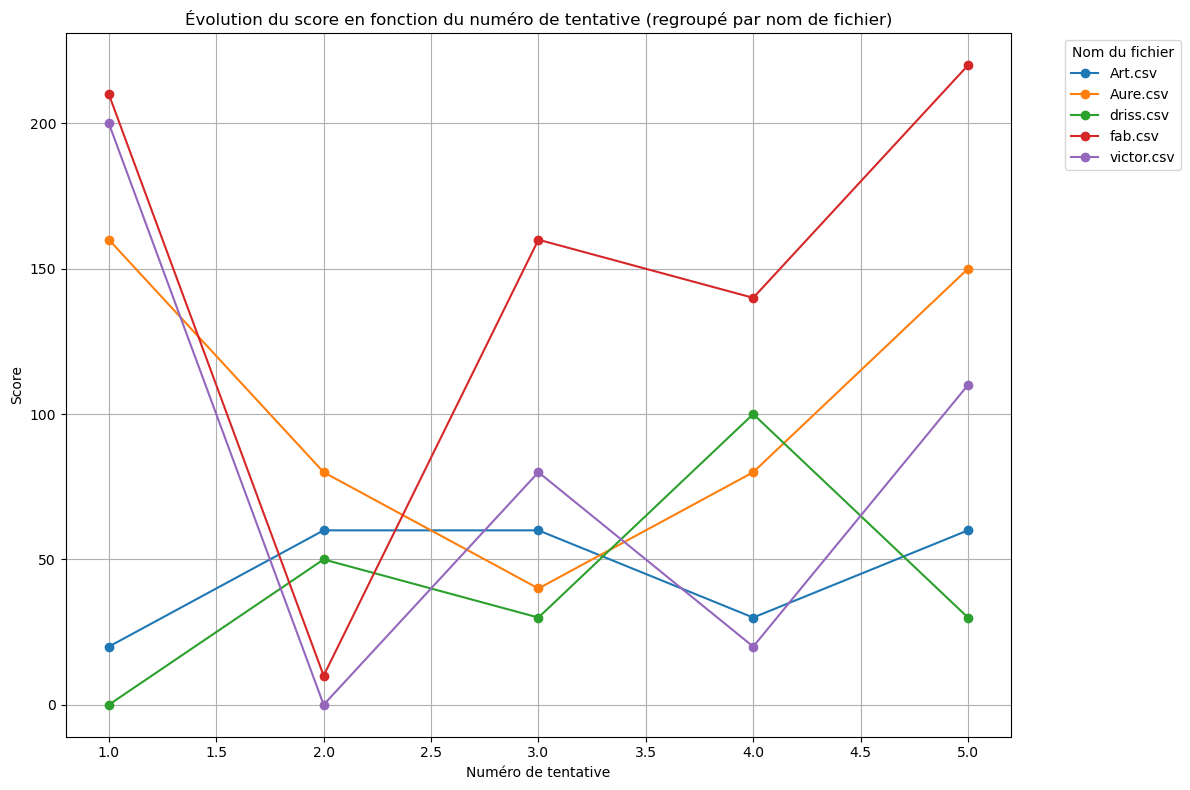

In [40]:

# --- 1. Affichage de l'évolution du score en fonction de l'attempt number regroupé par nom de fichier ---

# Créer un graphique pour chaque fichier
plt.figure(figsize=(12, 8))

# Groupement des données par nom de fichier
for filename in combined_data['Source File'].unique():
    # Filtrer les données pour chaque fichier
    df_filtered = combined_data[combined_data['Source File'] == filename]
    
    # Tracer l'évolution du score en fonction du numéro de tentative pour chaque fichier
    plt.plot(df_filtered['Attempt Number'], df_filtered['Score'], marker='o', label=filename)

# Ajouter des titres et des labels
plt.title('Évolution du score en fonction du numéro de tentative (regroupé par nom de fichier)')
plt.xlabel('Numéro de tentative')
plt.ylabel('Score')
plt.legend(title='Nom du fichier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Affichage du graphique
plt.tight_layout()
plt.show()

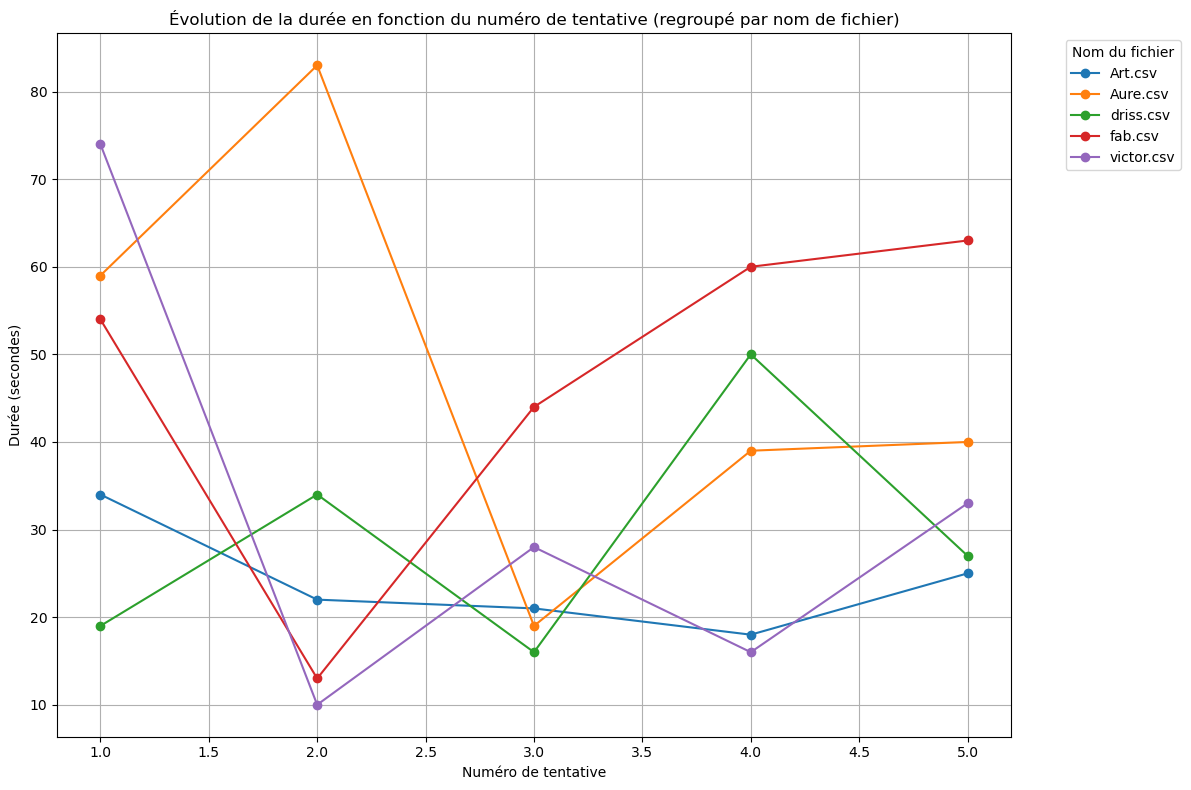

Le DataFrame combiné contient 25 lignes et 4 colonnes.


In [41]:
# --- 2. Affichage de l'évolution de la durée en fonction de l'attempt number regroupé par nom de fichier ---

plt.figure(figsize=(12, 8))

# Groupement des données par nom de fichier
for filename in combined_data['Source File'].unique():
    # Filtrer les données pour chaque fichier
    df_filtered = combined_data[combined_data['Source File'] == filename]
    
    # Tracer l'évolution de la durée en fonction du numéro de tentative pour chaque fichier
    plt.plot(df_filtered['Attempt Number'], df_filtered['Duration (seconds)'], marker='o', label=filename)

# Ajouter des titres et des labels
plt.title('Évolution de la durée en fonction du numéro de tentative (regroupé par nom de fichier)')
plt.xlabel('Numéro de tentative')
plt.ylabel('Durée (secondes)')
plt.legend(title='Nom du fichier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Affichage du graphique
plt.tight_layout()
plt.show()

# Afficher la forme du DataFrame combiné pour vérifier
print(f"Le DataFrame combiné contient {combined_data.shape[0]} lignes et {combined_data.shape[1]} colonnes.")


In [42]:

# --- 1. Regrouper les données par numéro de tentative et calculer la moyenne du score ---

# Groupement des données par 'Attempt Number' et calcul de la moyenne du score
mean_scores_by_attempt = combined_data.groupby('Attempt Number')['Score'].mean().reset_index()

# Afficher les moyennes du score par tentative
print(mean_scores_by_attempt)



   Attempt Number  Score
0               1  118.0
1               2   40.0
2               3   74.0
3               4   74.0
4               5  114.0


In [45]:

# --- 1. Regroupement des données par numéro de tentative et calcul des moyennes ---

# Regrouper par 'Attempt Number' et calculer la moyenne du score et de la durée
grouped_data = combined_data.groupby('Attempt Number').agg(
    moyenne_score=('Score', 'mean'),
    moyenne_duree=('Duration (seconds)', 'mean')
).reset_index()

# Afficher les premières lignes du DataFrame regroupé pour vérifier
print(grouped_data.head())



   Attempt Number  moyenne_score  moyenne_duree
0               1          118.0           48.0
1               2           40.0           32.4
2               3           74.0           25.6
3               4           74.0           36.6
4               5          114.0           37.6


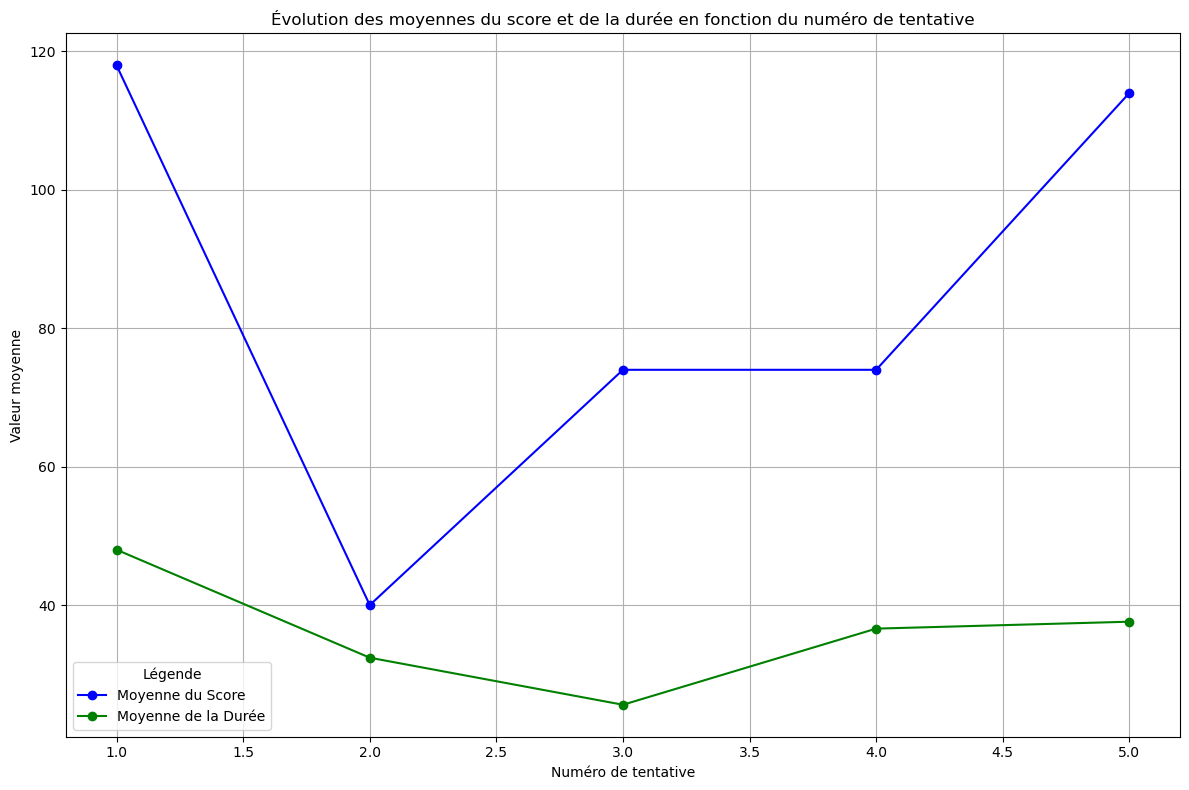

In [46]:
# --- 2. Affichage de l'évolution des moyennes du score et de la durée en fonction de l'attempt number ---

# Créer un graphique pour l'évolution des moyennes
plt.figure(figsize=(12, 8))

# Tracer l'évolution de la moyenne du score
plt.plot(grouped_data['Attempt Number'], grouped_data['moyenne_score'], marker='o', label='Moyenne du Score', color='b')

# Tracer l'évolution de la moyenne de la durée
plt.plot(grouped_data['Attempt Number'], grouped_data['moyenne_duree'], marker='o', label='Moyenne de la Durée', color='g')

# Ajouter des titres et des labels
plt.title('Évolution des moyennes du score et de la durée en fonction du numéro de tentative')
plt.xlabel('Numéro de tentative')
plt.ylabel('Valeur moyenne')
plt.legend(title='Légende')
plt.grid(True)

# Affichage du graphique
plt.tight_layout()
plt.show()

